<a href="https://colab.research.google.com/github/Akhilps04/Project-10/blob/main/Quality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

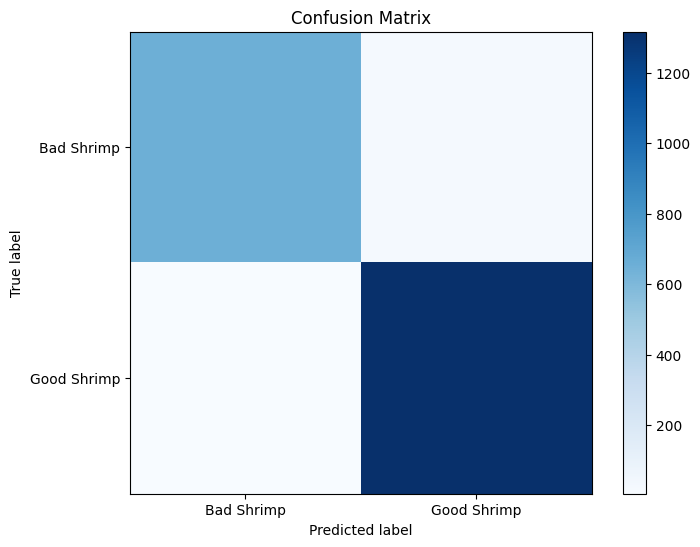

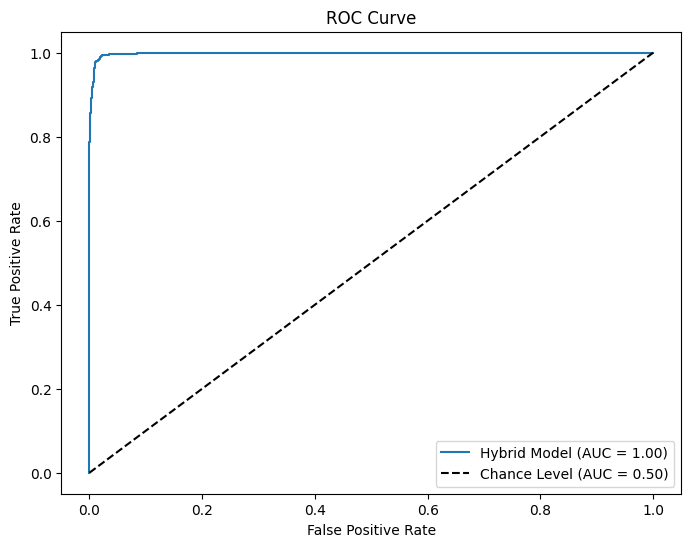

Cross-Validation Accuracy (Random Forest): 0.9869000000000001
Cross-Validation Accuracy (Gradient Boosting): 0.993
Cross-Validation Accuracy (SVM): 0.7754


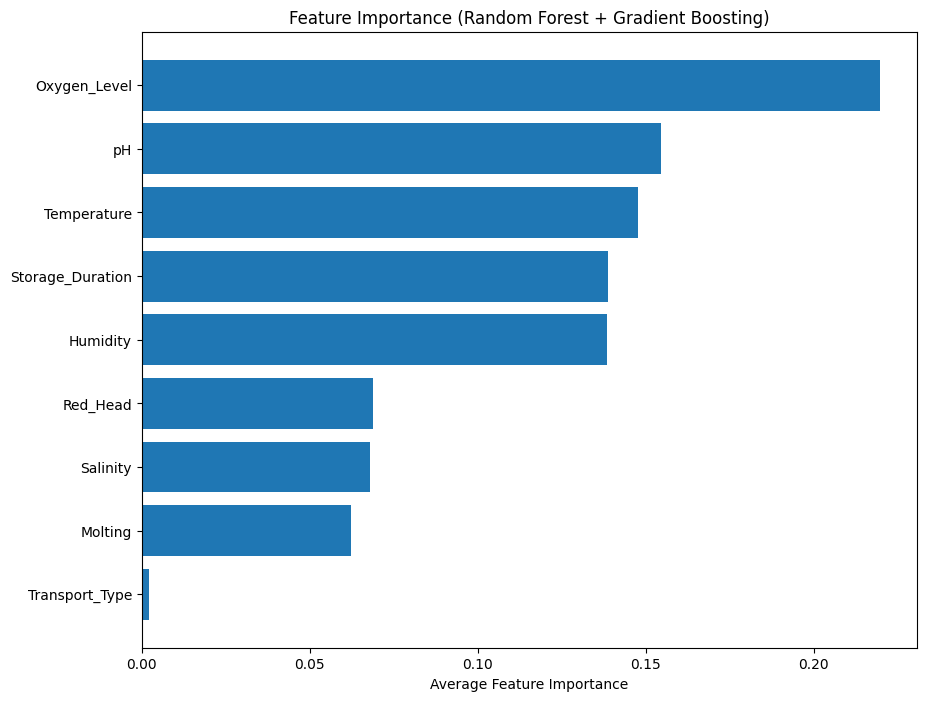

               Model  Accuracy
0      Random Forest    0.9895
1  Gradient Boosting    0.9940
2                SVM    0.7805
3       Hybrid Model    0.9850


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    roc_curve,
    auc,
    accuracy_score,
)
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("/content/drive/MyDrive/shrimp_quality_dataset (2).csv")

# Encode categorical variables
df["Transport_Type"] = df["Transport_Type"].map({"AirConditioned": 0, "OpenAir": 1})

# Split features and target
X = df.drop("Good_Bad_Shrimp", axis=1)
y = df["Good_Bad_Shrimp"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Define models for hybrid approach (Random Forest + SVM + Gradient Boosting)
rf = RandomForestClassifier(n_estimators=100, random_state=42)
gb = GradientBoostingClassifier(random_state=42)
svc = SVC(kernel="rbf", probability=True, random_state=42)

# Train models
rf.fit(X_train, y_train)
gb.fit(X_train, y_train)
svc.fit(X_train, y_train)

# Evaluate models
rf_preds = rf.predict(X_test)
gb_preds = gb.predict(X_test)
svc_preds = svc.predict(X_test)

# Accuracy
rf_accuracy = accuracy_score(y_test, rf_preds)
gb_accuracy = accuracy_score(y_test, gb_preds)
svc_accuracy = accuracy_score(y_test, svc_preds)

# Hybrid approach: Ensemble predictions (average probabilities)
rf_probs = rf.predict_proba(X_test)[:, 1]
gb_probs = gb.predict_proba(X_test)[:, 1]
svc_probs = svc.predict_proba(X_test)[:, 1]

# Ensemble probabilities (hybrid model)
ensemble_probs = (rf_probs + gb_probs + svc_probs) / 3
ensemble_preds = (ensemble_probs >= 0.5).astype(int)
ensemble_accuracy = accuracy_score(y_test, ensemble_preds)

# Confusion Matrix for the hybrid model
cm = confusion_matrix(y_test, ensemble_preds)

# ROC Curve for the hybrid model
fpr, tpr, _ = roc_curve(y_test, ensemble_probs)
roc_auc = auc(fpr, tpr)

# Visualization: Confusion Matrix
plt.figure(figsize=(8, 6))
plt.title("Confusion Matrix")
plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
plt.colorbar()
tick_marks = [0, 1]
plt.xticks(tick_marks, ["Bad Shrimp", "Good Shrimp"])
plt.yticks(tick_marks, ["Bad Shrimp", "Good Shrimp"])
plt.ylabel("True label")
plt.xlabel("Predicted label")
plt.show()

# Visualization: ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"Hybrid Model (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], "k--", label="Chance Level (AUC = 0.50)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()

# Cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores_rf = cross_val_score(rf, X, y, cv=cv, scoring="accuracy")
cv_scores_gb = cross_val_score(gb, X, y, cv=cv, scoring="accuracy")
cv_scores_svc = cross_val_score(svc, X, y, cv=cv, scoring="accuracy")
cv_scores_hybrid = cross_val_score(
    RandomForestClassifier(n_estimators=100, random_state=42), X, y, cv=cv, scoring="accuracy"
)

# Print Cross-Validation Results
print("Cross-Validation Accuracy (Random Forest):", np.mean(cv_scores_rf))
print("Cross-Validation Accuracy (Gradient Boosting):", np.mean(cv_scores_gb))
print("Cross-Validation Accuracy (SVM):", np.mean(cv_scores_svc))

# Feature Importance Visualization
rf_feature_importance = rf.feature_importances_
gb_feature_importance = gb.feature_importances_
feature_importance = (rf_feature_importance + gb_feature_importance) / 2

# Sort feature importance values
features = X.columns
sorted_idx = np.argsort(feature_importance)
sorted_features = features[sorted_idx]
sorted_importance = feature_importance[sorted_idx]

plt.figure(figsize=(10, 8))
plt.barh(sorted_features, sorted_importance, align="center")
plt.xlabel("Average Feature Importance")
plt.title("Feature Importance (Random Forest + Gradient Boosting)")
plt.show()

# Print Model Performance Summary
results = {
    "Model": ["Random Forest", "Gradient Boosting", "SVM", "Hybrid Model"],
    "Accuracy": [rf_accuracy, gb_accuracy, svc_accuracy, ensemble_accuracy],
}
results_df = pd.DataFrame(results)
print(results_df)
